In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import copy

from shapely import Point
from shapely import affinity, set_precision
from shapely.plotting import plot_points

sys.path.insert(1, '/Users/neoh/Documents/git/eeroqlab/')
#sys.path.insert(1, '/Users/helium/Documents/git/eeroqlab/')

%matplotlib inline
%config InlineBackend.figure_format='retina'


In [2]:
from zeroheliumkit.dev.core import GeometryCollection
from zeroheliumkit.dev.anchors import *
from zeroheliumkit.dev.geometries import *

from zeroheliumkit.settings import *
from zeroheliumkit.helpers.plotting import *

colorlist = [BLUE, YELLOW2, RED, GREEN, GRAY]

0.0


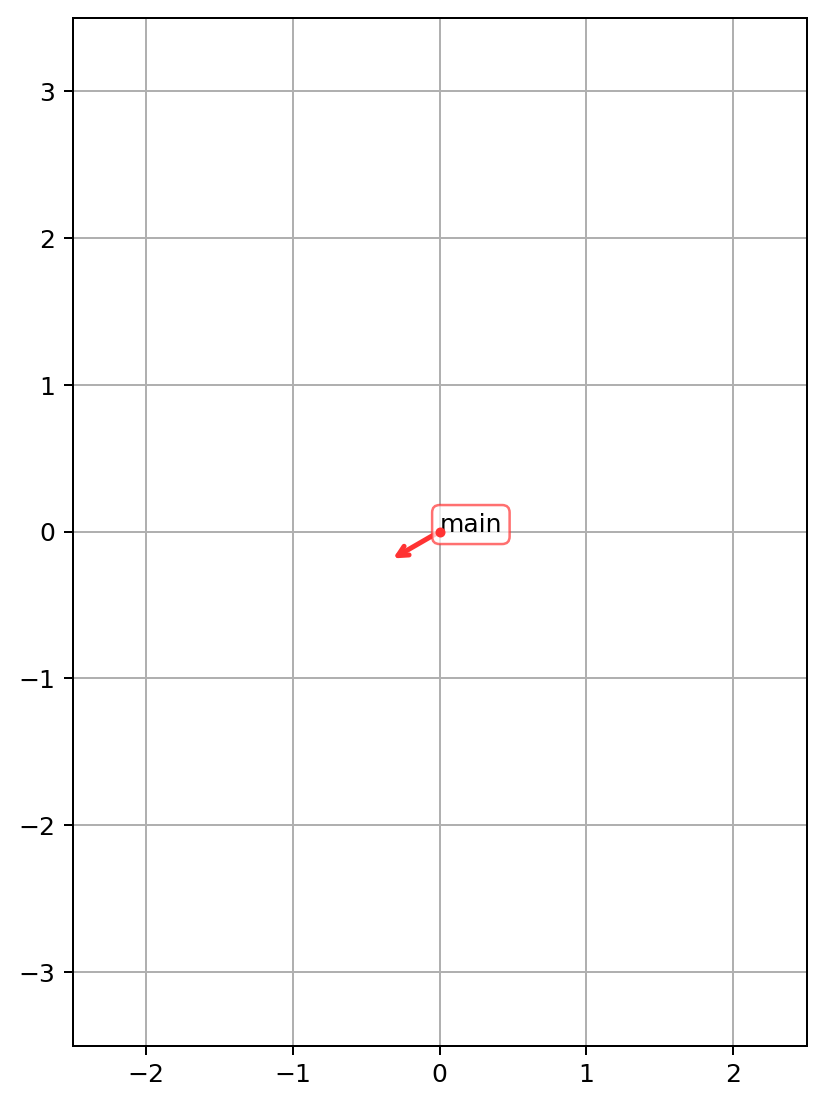

In [3]:
p = Anchor((0,0), 10, "main")
p.rotate(920)
print(p.x)

fig = plt.figure(1, figsize=SIZE_L, dpi=90)
ax = fig.add_subplot(111)
set_limits(ax=ax, coor=(0,0), dxdy=[5, 7])

p.plot(ax=ax, color=RED)

plt.grid()
plt.gca().set_aspect('equal')
plt.show()

In [5]:
config = {"top": True,
          "gnd": True}

In [6]:
pg = PinchGate(arm_w = 0.6, 
               arm_l = 8, 
               length = 20, 
               width = 4)
pgate_base = GeometryCollection(layers={"top": pg,
                                        "gnd": pg.buffer(0.4, join_style="mitre"),
                                        "anchorsmod": MultiAnchor([Anchor((0,0), 0, "a1"), Anchor((8 + 4 + 0.5, 0), 0, "a2")])})



pgate = Structure(config)
pgate.append(pgate_base)
"""
tp = Taper(length = 1,
           width1 = d["w1"],
           width2 = pinch["arm_w"],
           input_length = 2,
           output_length = 1,
           anchors = "flat",
           layers = {"top": None,
                     "gnd": (d["g1"], pinch["arm_g"])})
pgate.append(tp, anchoring=[0, 1], connection_type=conn)
pgate.move(origin_anchor=0)
pgate.delete_anchors([1])
"""
fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)
pgate_base.plot(ax=ax, layer=["gnd", "top", "anchorsmod"], color=colorlist)
plt.gca().set_aspect('equal')
plt.show()

something went wrong with setting precision
the error is  One of the arguments is of incorrect type. Please provide only Geometry objects.


ValueError: point label <zeroheliumkit.dev.anchors.Anchor object at 0x12b6ed0c0> is already exist in MultiAnchor. Choose different label name.

In [5]:
pgate_base.anchorsmod.multipoint[0].direction = 130

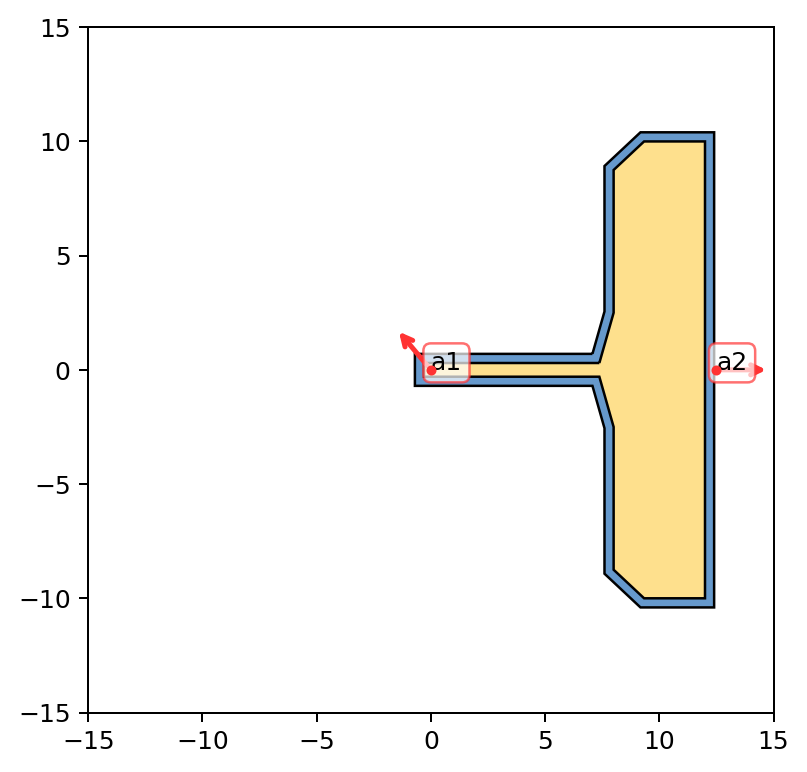

In [6]:
fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)
set_limits(ax=ax, coor=[0,0], dxdy=[30,30])
pgate_base.plot(ax=ax, layer=["gnd", "top", "anchorsmod"], color=colorlist, draw_direction=True)
plt.gca().set_aspect('equal')
plt.show()

In [7]:
pgate_base.get_anchor("a1").properties

-----  ----------  ---------
label  coords      direction
a1     (0.0, 0.0)  130
-----  ----------  ---------


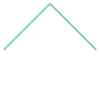

In [8]:
l1 = LineString([(0,0), (1,1)])
l2 = LineString([(1,1), (2,0)])
ll = unary_union([l1, l2])
ll